## Cryptocurrency Liquidity Prediction for Market Stability

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
#Loading and combining dataset
df1 = pd.read_csv('coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('coin_gecko_2022-03-17.csv')
df = pd.concat([df1, df2], ignore_index=True)


In [57]:
#  Data Preprocessing
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['liquidity_ratio'] = df['volume'] / df['mkt_cap']

In [59]:
#Feature Engineering
df['price_ma3'] = df['price'].rolling(3).mean()
df['volatility_3d'] = df['price'].rolling(3).std()

In [61]:
df.dropna(inplace=True)

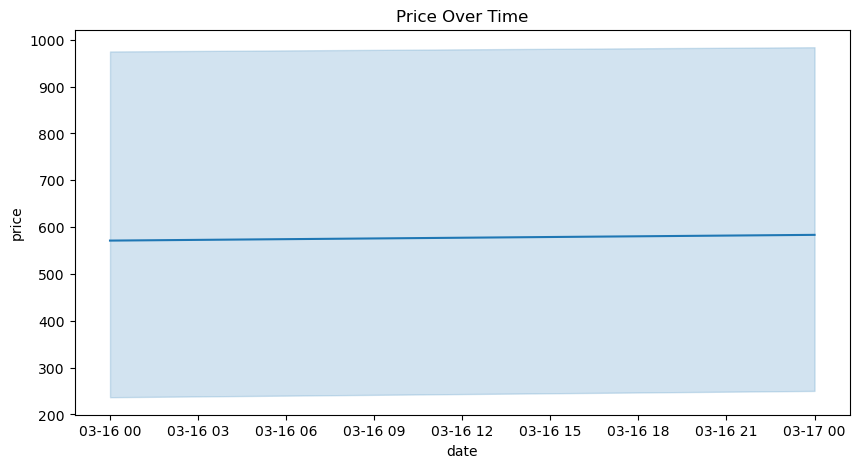

In [63]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='price', data=df)
plt.title("Price Over Time")
plt.show()


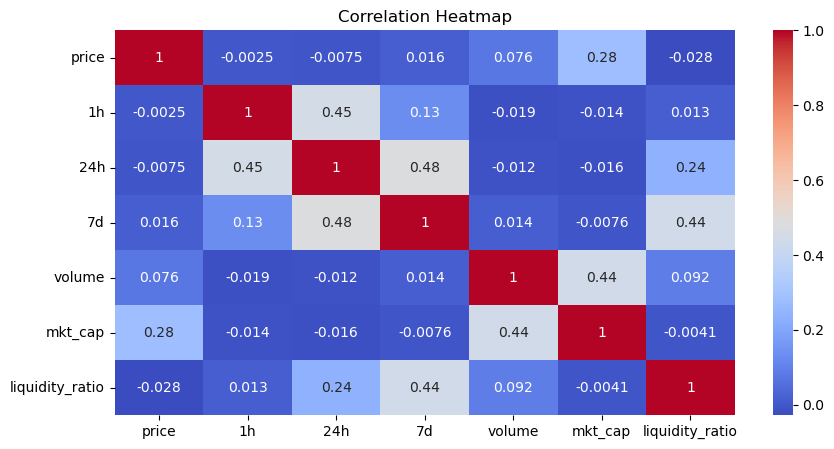

In [65]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['price', '1h', '24h', '7d', 'volume', 'mkt_cap', 'liquidity_ratio']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
df.describe()

,price,1h,24h,7d,volume,mkt_cap,date,liquidity_ratio,price_ma3,volatility_3d
count,9.900000e+02,990.000000,990.000000,990.000000,9.900000e+02,9.900000e+02,990,990.000000,990.000000,990.000000
mean,5.772604e+02,0.009656,0.024002,0.023485,2.333502e+08,2.682407e+09,2022-03-16 12:00:00,0.102515,592.865097,1001.131026
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00,0.000000,0.005170,0.004444
25%,1.933102e-01,0.001000,0.001000,-0.041000,1.758643e+06,1.158197e+08,2022-03-16 00:00:00,0.008727,1.042813,0.960356
50%,1.085000e+00,0.006000,0.016000,-0.001000,8.309320e+06,2.124629e+08,2022-03-16 12:00:00,0.033659,3.932023,5.061442
75%,6.767500e+00,0.019000,0.035000,0.036000,3.913953e+07,5.934192e+08,2022-03-17 00:00:00,0.087906,33.085840,50.131849
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00,5.948545,14558.933333,23787.419771
std,4.236743e+03,0.026938,0.058726,0.230008,2.462340e+09,2.755604e+10,NaN,0.365084,2463.095742,4200.676571


In [69]:
features = ['price', '1h', '24h', '7d', 'volume', 'mkt_cap', 'price_ma3', 'volatility_3d']
target = 'liquidity_ratio'

In [71]:
X = df[features]
y = df[target]


In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [77]:
#Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
#Model Evaluation
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))


R² Score: 0.804965709099182
RMSE: 0.14273473181727045
MAE: 0.027197753257284466
